# Learning Logistic Regression

## Step 1: Importing Libraries

In [15]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [16]:
churn_df = pd.read_csv('churnData.csv')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


## Step 2: Data preprocessing and selection

In [17]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ','equip','callcard', 'wireless', 'churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


## Practice

How many rows and columns are in this dataset in total? What are the names of columns

In [18]:
churn_df.shape

(200, 10)

In [19]:
churn_df.info

<bound method DataFrame.info of      tenure   age  address  income   ed  employ  equip  callcard  wireless  \
0      11.0  33.0      7.0   136.0  5.0     5.0    0.0       1.0       1.0   
1      33.0  33.0     12.0    33.0  2.0     0.0    0.0       0.0       0.0   
2      23.0  30.0      9.0    30.0  1.0     2.0    0.0       0.0       0.0   
3      38.0  35.0      5.0    76.0  2.0    10.0    1.0       1.0       1.0   
4       7.0  35.0     14.0    80.0  2.0    15.0    0.0       1.0       0.0   
..      ...   ...      ...     ...  ...     ...    ...       ...       ...   
195    55.0  44.0     24.0    83.0  1.0    23.0    0.0       1.0       0.0   
196    34.0  23.0      3.0    24.0  1.0     7.0    0.0       1.0       0.0   
197     6.0  32.0     10.0    47.0  1.0    10.0    0.0       1.0       0.0   
198    24.0  30.0      0.0    25.0  4.0     5.0    0.0       1.0       1.0   
199    61.0  50.0     16.0   190.0  2.0    22.0    1.0       1.0       1.0   

     churn  
0        1  
1    

In [20]:
churn_df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'churn'],
      dtype='object')

In [21]:
X = np.array(churn_df[['tenure','age','address','income','ed','employ', 'equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [22]:
y = np.array(churn_df['churn'])
y[0:5]

array([1, 1, 0, 0, 0])

In [23]:
# Normalize the data
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

## Step 3:Training 

In [24]:
# We split our datset into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=50)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)




Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


In [25]:
# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [26]:
# predict using our test set

yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0])

In [27]:
# predict proba

yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.60929593, 0.39070407],
       [0.56261203, 0.43738797],
       [0.66581936, 0.33418064],
       [0.60898438, 0.39101562],
       [0.53421542, 0.46578458],
       [0.64590907, 0.35409093],
       [0.65952353, 0.34047647],
       [0.67275894, 0.32724106],
       [0.5560352 , 0.4439648 ],
       [0.43865823, 0.56134177],
       [0.6057878 , 0.3942122 ],
       [0.5535045 , 0.4464955 ],
       [0.73980045, 0.26019955],
       [0.51067938, 0.48932062],
       [0.47374541, 0.52625459],
       [0.59236505, 0.40763495],
       [0.51430836, 0.48569164],
       [0.53656652, 0.46343348],
       [0.50259719, 0.49740281],
       [0.47609689, 0.52390311],
       [0.48369862, 0.51630138],
       [0.54312857, 0.45687143],
       [0.47209848, 0.52790152],
       [0.4883205 , 0.5116795 ],
       [0.52447277, 0.47552723],
       [0.51752996, 0.48247004],
       [0.48029597, 0.51970403],
       [0.55295633, 0.44704367],
       [0.64606443, 0.35393557],
       [0.45275098, 0.54724902],
       [0.

## Step 4: Evaluation

In [32]:
# confuison matrix

from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    """
    This function print and plot the confusion matrix.
    Normalization ca be applied by setting normalize=True
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))


[[11  8]
 [ 2 19]]


Confusion matrix, without normalization
[[11  8]
 [ 2 19]]


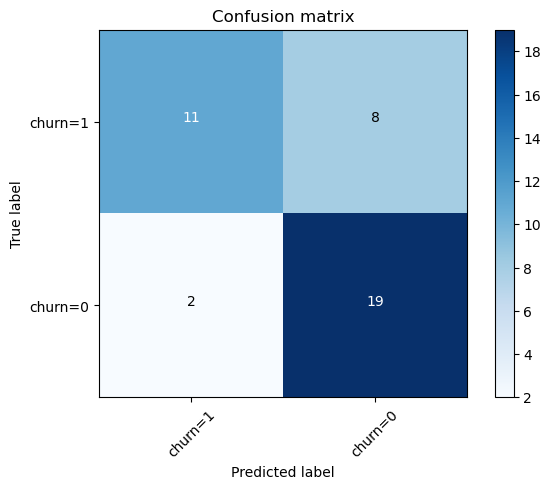

In [33]:
# Compute confusion matrix

cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize=False, title='Confusion matrix')

In [34]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.70      0.90      0.79        21
           1       0.85      0.58      0.69        19

    accuracy                           0.75        40
   macro avg       0.77      0.74      0.74        40
weighted avg       0.77      0.75      0.74        40



In [35]:
# log loss

from sklearn.metrics import log_loss
logloss = log_loss(y_test, yhat_prob)
logloss

0.5950726055391545

In [36]:
# Practice, use different parameters
# What is the new log loss

LR2 = LogisticRegression(C=0.001, solver='newton-cg').fit(X_train,y_train)

yhat2 = LR2.predict(X_test)
yhat_prob2 = LR2.predict_proba(X_test)
logloss2 = log_loss(y_test, yhat_prob2)
logloss2


0.7944225069592497

In [38]:
# Practice, use different solver

LR3 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)

yhat3 = LR3.predict(X_test)
yhat_prob3 = LR3.predict_proba(X_test)
logloss3 = log_loss(y_test, yhat_prob3)
logloss3

0.6938484642946358

The logloss values got above indicate the performance of a logistic regression model using different solvers. Logloss measures the discrepancy between predicted probabilities and actual outcomes, with lower values signifying better performance. Here’s a comparison of the logloss values mentioned:

1. **Logloss 0.59 using 'liblinear' solver:** This low logloss value suggests that the model using the 'liblinear' solver performs well in predicting probabilities. The 'liblinear' solver is suitable for small datasets and is less computationally expensive than other solvers.

2. **Logloss 0.79 using 'newton-cg' solver:** This higher logloss value indicates that the 'newton-cg' solver is less efficient compared to the 'liblinear' solver. The 'newton-cg' solver is more complex and computationally expensive, which might not be beneficial in this case.

3. **Logloss 0.69 using 'sag' solver:** This logloss value is slightly lower than the one obtained with the 'liblinear' solver but higher than the 'newton-cg' solver. The 'sag' solver is an improved version of the stochastic average gradient method and is more efficient for large datasets. However, it may not be as accurate as the 'liblinear' solver in this scenario.

In summary, the 'liblinear' solver generally provides the best performance in terms of logloss for logistic regression models, followed by the 'sag' solver. The 'newton-cg' solver may not be as efficient or accurate in this case. It’s essential to experiment with different solvers to determine the best performance for your specific dataset and problem.

In [39]:
# Use random forest instead

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Create a random forest classifier

clf = RandomForestClassifier(n_estimators=100)



In [40]:
# Train the classifier

clf.fit(X_train, y_train)

# Predict the labels of the test set

y_pred = clf.predict(X_test)

In [41]:
# Calculate the confusion matrix

confusion_matrix(y_test, y_pred)


array([[19,  2],
       [17,  2]], dtype=int64)

In [42]:
# Calculate the accuracy

accuracy = clf.score(X_test, y_test)
accuracy


0.525

In [43]:
# Calculate the precision

precision = precision_score(y_test, y_pred)
precision

0.5

In [44]:
# Calculate the recall

recall = recall_score(y_test, y_pred)
recall

0.10526315789473684

In [45]:
# Calculate the F1 score

f1 = f1_score(y_test, y_pred)
f1

0.17391304347826086